In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
# This is the test code to predict different cell classes
# Author Trnal (for MoNuSAC challenge 2020)

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import scipy.io
import openslide
from openslide import open_slide  

import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from custom import *

#
# ------------- IMPORTANT -----------------
# these paths need to be set before running the program
# save_as_mat - if false results will be stored as .tif images
#
data_path = MONUSAC_DATA
dest_path = os.path.dirname(os.getcwd()) + '/monusac_results/'
MODELS_PATH = os.path.dirname(os.getcwd()) + '/models/'
save_as_mat = True



create_folder(dest_path)


model_epi = base_model(verbose=False)
model_epi.load_weights(MODELS_PATH + 'MNS_epitel.h5')

model_lym = base_model(verbose=False)
model_lym.load_weights(MODELS_PATH + 'MNS_lymph.h5')

model_mac = base_model(verbose=False)
model_mac.load_weights(MODELS_PATH + 'MNS_macro.h5')

model_neu = base_model(verbose=False)
model_neu.load_weights(MODELS_PATH + 'MNS_neutro.h5')



patients = [x[0] for x in os.walk(data_path)]
if data_path in patients: patients.remove(data_path)

for patient in patients[:1]:
    
    patient_name = patient[len(data_path)+1:]#Patient name
    print(patient_name)
    
    #create patient directory
    create_folder(dest_path + patient_name)
    
    #for each image in patient
    sub_images = glob(patient+'/*.svs')
    for sub_image in sub_images:
    
        # convert to tif if needed
        if not os.path.isfile(sub_image[:-4] + '.tif'):
            img = openslide.OpenSlide(sub_name)
            cv2.imwrite(sub_image_loc[:-4]+'.tif', np.array(img.read_region((0,0),0,img.level_dimensions[0])))
        
        sub_image_name = sub_image[len(patient)+1:]
        dest_subimage = dest_path + patient_name + '/' + sub_image_name[:-4] + '/'
        
        #load image
        img = cv2.imread(sub_image[:-4] + '.tif')
        
        #create subimage directory and class directories in it
        create_folder(dest_subimage)
        
        create_folder(dest_subimage + 'Epithelial')
        create_folder(dest_subimage + 'Lymphocyte')
        create_folder(dest_subimage + 'Macrophage')
        create_folder(dest_subimage + 'Neutrophil')
        
        # get predictions
        epi_p, lym_p, mac_p, neu_p =  predict_all_classes(img, model_epi, model_lym, model_mac, model_neu)
        
        #create masks from predictions
        epi = create_mask(epi_p, size_limit=50)
        lym = create_mask(lym_p, size_limit=50)
        mac = create_mask(mac_p, size_limit=50)
        neu = create_mask(neu_p, size_limit=50)
        
        # save results
        if save_as_mat:
            scipy.io.savemat(dest_subimage + 'Epithelial/' + sub_image_name[:-4] + '.mat', {epi.dtype.name: epi})
            scipy.io.savemat(dest_subimage + 'Lymphocyte/' + sub_image_name[:-4] + '.mat', {lym.dtype.name: lym})
            scipy.io.savemat(dest_subimage + 'Macrophage/' + sub_image_name[:-4] + '.mat', {mac.dtype.name: mac})
            scipy.io.savemat(dest_subimage + 'Neutrophil/' + sub_image_name[:-4] + '.mat', {epi.dtype.name: neu})
        else:
            cv2.imwrite(dest_subimage + 'Epithelial/' + sub_image_name[:-4]+'.tif', epi)
            cv2.imwrite(dest_subimage + 'Lymphocyte/' + sub_image_name[:-4]+'.tif', lym)
            cv2.imwrite(dest_subimage + 'Macrophage/' + sub_image_name[:-4]+'.tif', mac)
            cv2.imwrite(dest_subimage + 'Neutrophil/' + sub_image_name[:-4]+'.tif', neu)
            


In [117]:
data_path = MONUSAC_DATA

patients = [x[0] for x in os.walk(data_path)]
if data_path in patients: patients.remove(data_path)
print(len(patients))

46


In [122]:
dest_path = os.path.dirname(os.getcwd()) + '/monusac_results/'

In [144]:
create_folder(dest_path)

for patient in patients[:1]:
    
    patient_name = patient[len(data_path)+1:]#Patient name
    print(patient_name)
    
    #create patient directory
    create_folder(dest_path + patient_name)
    
    #for each image in patient
    sub_images = glob(patient+'/*.svs')
    for sub_image in sub_images:
    
        # convert to tif if needed
        if not os.path.isfile(sub_image[:-4] + '.tif'):
            img = openslide.OpenSlide(sub_name)
            cv2.imwrite(sub_image_loc[:-4]+'.tif', np.array(img.read_region((0,0),0,img.level_dimensions[0])))
        
        sub_image_name = sub_image[len(patient)+1:]
        dest_subimage = dest_path + patient_name + '/' + sub_image_name[:-4] + '/'
        
        #load image
        img = cv2.imread(sub_image[:-4] + '.tif')
        
        #create subimage directory and class directories in it
        create_folder(dest_subimage)
        
        create_folder(dest_subimage + 'Epithelial')
        create_folder(dest_subimage + 'Lymphocyte')
        create_folder(dest_subimage + 'Macrophage')
        create_folder(dest_subimage + 'Neutrophil')
        
        epi_p, lym_p, mac_p, neu_p =  predict_all_classes(img, model_epi, model_lym, model_mac, model_neu)
        
        epi = create_mask(epi_p, size_limit=50)
        lym = create_mask(lym_p, size_limit=50)
        mac = create_mask(mac_p, size_limit=50)
        neu = create_mask(neu_p, size_limit=50)
        
        if save_as_mat:
            scipy.io.savemat(dest_subimage + 'Epithelial/' + sub_image_name[:-4] + '.mat', {epi.dtype.name: epi})
            scipy.io.savemat(dest_subimage + 'Lymphocyte/' + sub_image_name[:-4] + '.mat', {lym.dtype.name: lym})
            scipy.io.savemat(dest_subimage + 'Macrophage/' + sub_image_name[:-4] + '.mat', {mac.dtype.name: mac})
            scipy.io.savemat(dest_subimage + 'Neutrophil/' + sub_image_name[:-4] + '.mat', {epi.dtype.name: neu})
        else:
            cv2.imwrite(dest_subimage + 'Epithelial/' + sub_image_name[:-4]+'.tif', epi)
            cv2.imwrite(dest_subimage + 'Lymphocyte/' + sub_image_name[:-4]+'.tif', lym)
            cv2.imwrite(dest_subimage + 'Macrophage/' + sub_image_name[:-4]+'.tif', mac)
            cv2.imwrite(dest_subimage + 'Neutrophil/' + sub_image_name[:-4]+'.tif', neu)
            

CGA-73-4668-01Z-00-DX1


KeyboardInterrupt: 

In [141]:
def create_folder(path):
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)

In [142]:
# compare predictions 
def predict_all_classes(img, model_epi, model_lym, model_mac, model_neu):
    pred_result_epi = collect_output(model_epi, img, stride=32, padding=8)
    pred_result_lym = collect_output(model_lym, img, stride=32, padding=8)
    pred_result_mac = collect_output(model_mac, img, stride=32, padding=8)
    pred_result_neu = collect_output(model_neu, img, stride=32, padding=8)

    epi_mask = np.ones(pred_result_epi.shape)
    epi_mask[pred_result_epi < pred_result_lym] = 0
    epi_mask[pred_result_epi < pred_result_neu] = 0
    epi_mask[pred_result_epi < pred_result_mac] = 0

    lym_mask = np.ones(pred_result_epi.shape)
    lym_mask[pred_result_lym < pred_result_epi] = 0
    lym_mask[pred_result_lym < pred_result_mac] = 0
    lym_mask[pred_result_lym < pred_result_neu] = 0

    mac_mask = np.ones(pred_result_epi.shape)
    mac_mask[pred_result_mac < pred_result_epi] = 0
    mac_mask[pred_result_mac < pred_result_lym] = 0
    mac_mask[pred_result_mac < pred_result_neu] = 0

    neu_mask = np.ones(pred_result_epi.shape)
    neu_mask[pred_result_neu < pred_result_epi] = 0
    neu_mask[pred_result_neu < pred_result_lym] = 0
    neu_mask[pred_result_neu < pred_result_mac] = 0

    pred_result_epi *= epi_mask
    pred_result_lym *= lym_mask
    pred_result_mac *= mac_mask
    pred_result_neu *= neu_mask
    
    return pred_result_epi, pred_result_lym, pred_result_mac, pred_result_neu

In [143]:
def create_mask(pred_result, size_limit=50):
    bw = otsu_threshold(pred_result)
    no_labels, labels, stats, _ = cv2.connectedComponentsWithStats(bw)
    df = pd.DataFrame(stats, columns=['left', 'top', 'width', 'height', 'area'])
    small = df.index[df['area'] < size_limit].tolist()
    for sm in small: 
        labels[labels==sm] = 0
    labels[labels>0] = 255
    
    return labels.astype('uint8')

In [146]:
cv2.imwrite('bla.mat', img)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:661: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


In [153]:
tmp = {img.dtype.name: img}
scipy.io.savemat('test.mat', tmp)

In [152]:
import scipy.io
img.dtype.name

'uint8'

In [154]:
this_folder

'/Users/macbook/Desktop/SKOLA/DP/Code/bla'

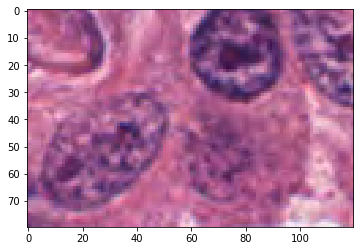

In [156]:
f = img[:80, :120, :]
plt.imshow(f)

In [163]:
patch_size = 128
if f.shape[0] < patch_size or f.shape[1] < patch_size:
    shorter = min(f.shape[0], f.shape[1])
    ratio = patch_size/shorter
    dim0 = int(math.ceil(f.shape[0]*ratio))
    dim1 = int(math.ceil(f.shape[1]*ratio))
    f = cv2.resize(img, (dim0, dim1))

128
192


(192, 128, 3)

In [171]:
old_shape = img.shape[0], img.shape[1]
a = np.zeros((3,3))  

if old_shape != -1: a = cv2.resize(a, old_shape)
a.shape

(1024, 1024)

(1024, 1024)